# Rotterdam stylized case
#### last updated 17/3/2020

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from collections import OrderedDict

### Step 1: calculate one possible realisation of actual storm surge levels at Rotterdam, for 4 different scenarios of SLR 
Each time you run you get another possible realisation of storm surge levels

Text(0, 0.5, 'Storm surge height (m)')

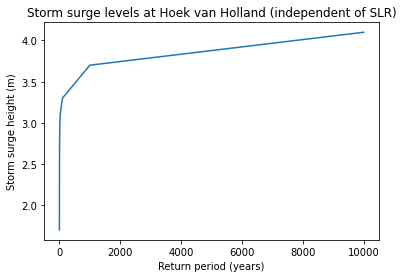

In [3]:
#STORM SURGE LEVELS AT HOEK VAN HOLLAND (ASSUMED TO BE INDEPENDENT OF SEA LEVEL RISE)
#Very roughly taken from Sterl et al. (2009)
RP = [1/5,  1/2,1 ,  2,  5,10,25  ,100,1000,10000]
surge = [1.7,2  ,2.2 ,2.4,2.7,2.9,3.1,3.3,3.7 ,4.1]
plt.plot(RP,surge)
plt.title('Storm surge levels at Hoek van Holland (independent of SLR)')
plt.xlabel('Return period (years)')
plt.ylabel('Storm surge height (m)')

In [4]:
#FOR NOW: ASSUME THAT ONE STORM PER YEAR WILL OCCUR
startyear = 2021
endyear = 2120
#APPROXIMATION OF THE GUMBEL PLOT OF Sterl et al. (2009) 
#"An ensemble study of extreme storm surge related water levels in the North Sea in a changing climate"
mu = 2.33
beta = 0.234
surges_t = np.random.gumbel(mu,beta,size=100) #calculates a storm surge level (m) for each year

In [5]:
#SLR scenarios
year = [2000,2020,2050,2075,2100]
A =    [0,   0.1 , 0.2, 0.3, 0.4] #Haasnoot et al. 2020, lower part of blue shaded area
B =    [0,   0.1 ,0.25,0.45, 1.0] #Middle of RCP4.5
C =    [0,   0.1 , 0.3,0.7 , 1.8] #Middle of RCP8.5
D =    [0,   0.15, 0.4, 1.0 ,3.0] #Max of RCP8.5   

#determine coefficients of paraboles plotted through these functions
A_p = np.polyfit(year,A,2) #returns the coefficient of the paraboles (highest first)
B_p = np.polyfit(year,B,2)
C_p = np.polyfit(year,C,2)
D_p = np.polyfit(year,D,2)

time = np.arange(2021,2121) #create list from 2020 to 2120

#CREATE TIME SERIES FOR SEA LEVEL RISE (IMITATE THOSE IN HAASNOOT ET AL 2020)
A_t = [(lambda x: A_p[2]+A_p[1]*x+A_p[0]*x**2)(x) for x in time]
B_t = [(lambda x: B_p[2]+B_p[1]*x+B_p[0]*x**2)(x) for x in time]
C_t = [(lambda x: C_p[2]+C_p[1]*x+C_p[0]*x**2)(x) for x in time]
D_t = [(lambda x: D_p[2]+D_p[1]*x+D_p[0]*x**2)(x) for x in time]

In [6]:
#Sum the storm surge levels and the SLR scenarios
levels_A_t = surges_t+A_t
levels_B_t = surges_t+B_t
levels_C_t = surges_t+C_t
levels_D_t = surges_t+D_t

#CALCULATE THE RPS (what would be the return period of the future floods for statistics of the current situation)
#WILL PROBABLY NO LONGER BE USED IN THE MODEL, BUT NICE TO KEEP FOR NOW
RPs_A_t = np.interp(levels_A_t,surge,RP)
RPs_B_t = np.interp(levels_B_t,surge,RP)
RPs_C_t = np.interp(levels_C_t,surge,RP)
RPs_D_t = np.interp(levels_D_t,surge,RP)

Text(0.5, 1.0, 'Scenario D')

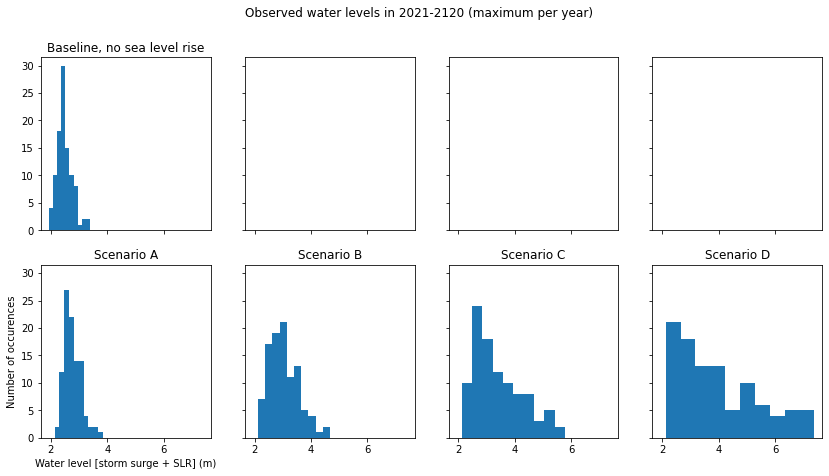

In [7]:
### PLOT THE HISTOGRAMS OF THE DIFFERENT RETURN PERIODS
figure, axes = plt.subplots(nrows=2,ncols=4,sharey=True,sharex=True,figsize=(14,7))
axes[0,0].hist(surges_t)
axes[1,0].hist(levels_A_t)
axes[1,1].hist(levels_B_t)
axes[1,2].hist(levels_C_t)
axes[1,3].hist(levels_D_t)
figure.suptitle('Observed water levels in 2021-2120 (maximum per year)')
axes[0,0].set_title('Baseline, no sea level rise')
axes[1,0].set_xlabel('Water level [storm surge + SLR] (m)')
axes[1,0].set_ylabel('Number of occurences')
axes[1,0].set_title('Scenario A')
axes[1,1].set_title('Scenario B')
axes[1,2].set_title('Scenario C')
axes[1,3].set_title('Scenario D')

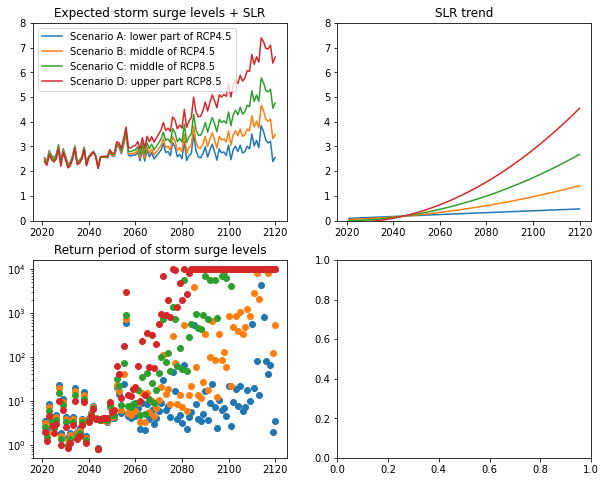

In [8]:
#Plot as a time series

fig, axes = plt.subplots(nrows=2,ncols=2,sharey=False,figsize=(10,8))
#fig = plt.figure()
axes[0,0].plot(time,levels_A_t,
             time,levels_B_t,
             time,levels_C_t,
             time,levels_D_t)
axes[0,0].legend(labels=[
    'Scenario A: lower part of RCP4.5',
    'Scenario B: middle of RCP4.5',   
    'Scenario C: middle of RCP8.5',   
    'Scenario D: upper part RCP8.5',
])
axes[0,0].set_title('Expected storm surge levels + SLR')
axes[0,1].set_title('SLR trend')
axes[1,0].set_title('Return period of storm surge levels')
axes[0,1].plot(time,A_t,time,B_t,time,C_t,time,D_t)

axes[0,0].set_ylim(0,8)
axes[0,1].set_ylim(0,8)

axes[1,0].scatter(time,RPs_A_t)
axes[1,0].scatter(time,RPs_B_t)
axes[1,0].scatter(time,RPs_C_t)
axes[1,0].scatter(time,RPs_D_t)
axes[1,0].set_yscale('log')

In [9]:
#Tijdelijke aanname

FPL_h = 4.5 #Current flood protection level in m

### Step 2: Flood protection levels in place

In [10]:
# Public trust

# The trust ranges from 0 to 100%, with 100% begin good
# Normally, the trust is around 70 %

In [11]:
#RPs_A_t.astype(int)

### Step 3: Storm surges have an impact on trust

In [21]:
#Array that describes the threshold for possible alarming conditions
#Structure of this dict: minimum water level (m) [name event,decrease of trust in event]
alarming_conditions = OrderedDict({
    5   : ['Major flood',40], 
    4.8 : ['Small flood',20],
    4.6 : ['Minor flood',10],
    4.4 : ['Near miss',5],
    3.5 : ['Major wake-up',3],
    3.0 : ['Minor wake-up',2],
    -1  : ['Nothing happens',0]
 })

def evaluate_event(water_level,alarming_conditions,report):
    "Returns a decrease in trust for a given water level of an event"
    for key, value in alarming_conditions.items():
        #print (key, value)
        if water_level >= key:
            if report:
                print("This is a: {}, so trust goes down with {}".format(value[0],value[1]))
            break
    trust = value[1]
    return trust

def calculate_trust(time,events):
    """Calculate the development of trust over time, for a series of events
    Input:
        *time* : List of year numbers
        *events* : time series of events
        
    Returns:
        *Trust* : development of trust over time (0-100% scale)
    
    """
    T_t = [None] * len(time)
    T_t[0] = 50 #initial trust condition
    for i,t in enumerate(time):
        if i != 0:
            #First evaluate the impact of this year's event (if any)
            event_impact = evaluate_event(events[i],alarming_conditions)
            
            if event_impact != 0:             #If something happens due to an event:
                T_t[i] = T_t[i-1] - event_impact
                
            else:                             #If nothing happens: 
                k = 0.4 
                T_eq = 70
                dTdt = (T_t[i-1]-T_eq)*-k
                T_t[i] = T_t[i-1] + dTdt

    return T_t

Text(0.5, 1.0, 'Development of public trust in the capabilities of the government')

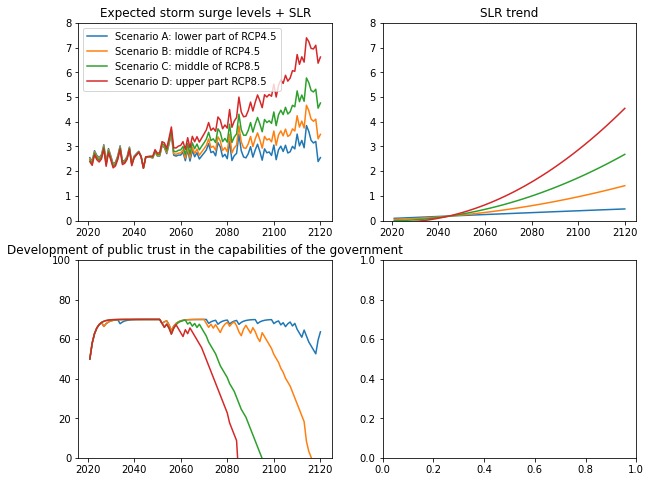

In [13]:
#Plot as a time series

fig, axes = plt.subplots(nrows=2,ncols=2,sharey=False,figsize=(10,8))
#fig = plt.figure()
axes[0,0].plot(time,levels_A_t,
             time,levels_B_t,
             time,levels_C_t,
             time,levels_D_t)
axes[0,0].legend(labels=[
    'Scenario A: lower part of RCP4.5',
    'Scenario B: middle of RCP4.5',   
    'Scenario C: middle of RCP8.5',   
    'Scenario D: upper part RCP8.5',
])
axes[0,0].set_title('Expected storm surge levels + SLR')
axes[0,1].set_title('SLR trend')
axes[1,0].set_title('Return period of storm surge levels')
axes[0,1].plot(time,A_t,time,B_t,time,C_t,time,D_t)

axes[0,0].set_ylim(0,8)
axes[0,1].set_ylim(0,8)


axes[1,0].plot(time,calculate_trust(time,levels_A_t),
               time,calculate_trust(time,levels_B_t),
               time,calculate_trust(time,levels_C_t),
               time,calculate_trust(time,levels_D_t))
axes[1,0].set_ylim(0,100)
axes[1,0].set_title('Development of public trust in the capabilities of the government')


# Create different zones in the city

In [28]:
#Initiate classes of the model (~make the type of lego Blocks)

#class IterRegistry(type): #Keep track of all the instances of the different classes that were created
#    def __iter__(cls):
#        return iter(cls._registry)

allFloodProtection = []
allResidentialArea = []

class FloodProtection:
    """
    Initiate FloodProtection class, which are flood protection infrastructures which...
     - Protect a certain area
     - Against flood with a certain water level (in the baseline situation)
     - Moveable barrier?
    """
    
    def __init__(self,name,baseline_level,moveable):
        self.name = name #Name of the flood protection object (string)
        self.baseline_level = baseline_level
        self.barrier = moveable
        allFloodProtection.append(self) #Add to the overview of all flood protection objects

class ResidentialArea():
    trust_0 = 70 #initial trust of citizens, same for all residential areas
    
    def __init__(self,name,elevation,protected_by):
        self.name = name #Name of the object (string)
        self.elevation = elevation #Elevation of the Residential Area in m
        self.protected_by = protected_by #Names of the FloodProtection objects it is protected by
        
        allResidentialArea.append(self) #Add to the overview of all flood protection objects
    
    def match_with_FloodProtection(self):
        for i in allFloodProtection: #Iterate over all possible FloodProtections 
            for j in self.protected_by: #Iterate over the structures the area is protected by (for now only one! -> later expand and make decision rules if multiple exist)
                if i.name == j:
                    #print('hoi, ik word beschermd door: {}'.format(self.protected_by))
                    self.protection_level = i.baseline_level
                else:
                    #print('Gast, ik word niet beschermd!!!')
                    pass
    
    ### Will probably be deleted, not good for the workflow
    #def evaluate_flood(self,time,levels_t):
    #    self.time = time
    #    self.levels_t = levels_t
    #    #test = [(lambda x: x)(x) for x in levels_t if x > 3]
    #    floods_t = [None] * len(time) #create emtpy array to store results
    #    for i,t in enumerate(time): #iterate over the time step
    #        if levels_t[i] > self.protection_level: #if the flood protection level is exceeded
    #            floods_t[i] = True #indicate that there is a flood
    #    return floods_t

class Major:
    def __init__(self,name):
        self.name = name

In [29]:
#Create Flood Protection objects
Maeslantkering = FloodProtection("Maeslantkering",5,True)
Dike = FloodProtection("Sea Dike",4.5,False)
No = FloodProtection("No flood protection",0,False)

#Create ResidentialAreas
Area_A = ResidentialArea("Residential area A: the Heijplaat",4,["No flood protection"])
Area_B = ResidentialArea("Residential area B: city centre",1,["Sea Dike"])

#Create Major
Berry = Major("Berry Kroket")

In [30]:
#ADD THE INFORMATION OF THE FLOOD PROTECTION STRUCTURES TO THE AREAS IT PROTECTS
for A in allResidentialArea:
    A.match_with_FloodProtection()
    print(A.__dict__)


{'name': 'Residential area A: the Heijplaat', 'elevation': 4, 'protected_by': ['No flood protection'], 'protection_level': 0}
{'name': 'Residential area B: city centre', 'elevation': 1, 'protected_by': ['Sea Dike'], 'protection_level': 4.5}


The trust in a residential area can develop in two different ways:
 - because of the near-hits etc.
 - because of actual flood events
 
So two different functions for residential areas:
  - evaluate the near-hits
      - Compare the water levels to the water levels of the implemented infrastructure => has an impact on trust
  - evaluate the actual flood events
      - Compare the water levels to the water levels of the implemented infrastructure
      - If there is a dike breach: evaluate the damage => has an impact on trust
                                                       => is causing damage
                                                       
First step: the area should inherit functionality from the flood protection class **done**
Iterate over time and compute if a flood happens **done**
Evaluate trust and add to the agents (region-independent)

In [52]:
levels_t = levels_A_t

### ADD THE TRUST PARAMETER TO ALL RESIDENTIAL AREAS
for Area in allResidentialArea:
    Area.trust_t = [None] * len(time)
    Area.trust_t[0] = Area.trust_0
    
for i,t in enumerate(time): #Iterate over the years t, with index i
    print(i,t)
    
    #START WITH AUTONOMOUS EVALUATION OF THE FLOODS FOR THE RESIDENTIAL AREAS
    for Area in allResidentialArea:
        if Area.protection_level >= levels_t[i]: 
            pass
        else: #In case the flood protection is overtopped
            print("Relevant storm surge with surge level of {} m in year {}".format(levels_t[i],t))
            if Area.elevation >= levels_t[i]: #No inundation
                pass
            else:
                waterdepth = levels_t[i] - Area.elevation
                print("Inundation of {} by {}".format(Area.name,waterdepth))

    #EVALUATE THE DEVELOPMENT OF TRUST (FOR NOW, INDEPENDENT OF FLOODS MODULE)
    if i != 0: #don't evaluate trust in the first timestep!
        for Area in allResidentialArea:
            event_impact = evaluate_event(levels_t[i],alarming_conditions,True)
            #First evaluate the impact of this year's event (if any)

            if event_impact != 0:             #If something happens due to an event:
                Area.trust_t[i] = Area.trust_t[i-1] - event_impact

            else:                             #If nothing happens: 
                k = 0.4 
                T_eq = 70
                dTdt = (Area.trust_t[i-1]-T_eq)*-k
                Area.trust_t[i] = Area.trust_t[i-1] + dTdt

0 2021
Relevant storm surge with surge level of 2.5460713003122857 m in year 2021
1 2022
Relevant storm surge with surge level of 2.401729417513352 m in year 2022
This is a: Nothing happens, so trust goes down with 0
This is a: Nothing happens, so trust goes down with 0
2 2023
Relevant storm surge with surge level of 2.8285140448796167 m in year 2023
This is a: Nothing happens, so trust goes down with 0
This is a: Nothing happens, so trust goes down with 0
3 2024
Relevant storm surge with surge level of 2.636052292824137 m in year 2024
This is a: Nothing happens, so trust goes down with 0
This is a: Nothing happens, so trust goes down with 0
4 2025
Relevant storm surge with surge level of 2.5436057132882772 m in year 2025
This is a: Nothing happens, so trust goes down with 0
This is a: Nothing happens, so trust goes down with 0
5 2026
Relevant storm surge with surge level of 2.66662342753893 m in year 2026
This is a: Nothing happens, so trust goes down with 0
This is a: Nothing happens

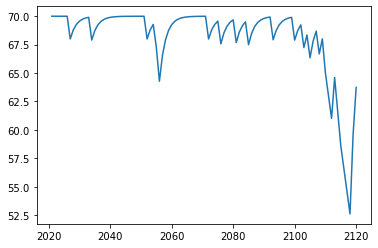

In [53]:
plt.plot(time,Area_B.trust_t)